In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TweetTokenizer
import nltk
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


import emoji
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [2]:
# Created a list to append all tweet attributes(data)
attributes_container = []
Q = '(sambo AND polisi) OR (joshua AND polisi)'
Q2 = 'polisi AND kanjuruhan'

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(Q2 + ' since:2022-10-01 until:2022-10-16 -filter:retweets -filter:links').get_items()):
    if i > 10000:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.content])

# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(attributes_container, columns=[
                         "Date Created", "Number of Likes", "Tweets"])
tweets_df2 = pd.DataFrame(attributes_container, columns=[
                          "Date Created", "Number of Likes", "Tweets"])


In [3]:
# tweets_df
# tweets_df2

In [4]:
# tweets_df.to_csv('10K sambo josua polisi.csv')  
# tweets_df2.to_csv('10k2_'+Q2 + '.csv')  

In [5]:
df1 = pd.read_csv('10k_polisi AND kanjuruhan.csv')
df1 = df1.drop(columns=['Unnamed: 0', 'Date Created', 'Number of Likes'])

df2 = pd.read_csv('10K sambo josua polisi.csv')
df2 = df2.drop(columns=['Unnamed: 0', 'Date Created', 'Number of Likes'])


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub('@[^\s]+','',text)
    text = re.sub('http[^\s]+','',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub("[^a-z0-9]"," ", text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text



df1['Tweets'] = df1['Tweets'].apply(clean_text)
df2['Tweets'] = df2['Tweets'].apply(clean_text)

In [7]:
df1

,Tweets
0,sama mas saya pikir fokusnya sama bobroknya ke...
1,haduh polisi lagi yg ditonjolkan polisi dah n...
2,membuat konsorsium judi menjadi sindikat narko...
3,yg gak punya wibawa ya jokowi dan mempora ma...
4,ditambah lg dgn tembakan gas air mata k tribun...
...,...
9996,seuporter merasa benar turun k lapang kanjuruh...
9997,penonton salah polisi salah semuanya salah di...
9998,ini waktu di gbt setelah persebaya kalah law...
9999,citra polisi indonesia bisa hancur jika kasus ...


In [8]:
df2

,Tweets
0,keren jokowi tangkap penjahat kakap kemaren a...
1,dipikirpikir pantesan polisi tahuntahun belaka...
2,setelah kasus sambo yang mayan ribet banyak p...
3,bubarkan institusi kepolisian copot kapolr...
4,memang kalau jadi polisi baik karir telat jab...
...,...
9996,ini baru benar polisipengayomrakyat jangan j...
9997,polisi sambo budaya kekerasan om bukankah in...
9998,terkuak kenapa densi kebal hukum ternyata i...
9999,kata bapak w polisi sewa uya kuya aja biar sam...


In [9]:
# save clean
df1_clean = df1
df2_clean = df2

df1_clean.to_csv('df1_clean.csv')
df2_clean.to_csv('df2_clean.csv')

In [21]:
# Stopword
f = open("stopword_id.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [11]:
# tokenize
tk = TweetTokenizer()
df1_clean['tokenized_text'] = df1_clean['Tweets'].apply(tk.tokenize) 
df2_clean['tokenized_text'] = df2_clean['Tweets'].apply(tk.tokenize) 

In [12]:
df1_clean
# nltk.download('punkt')

,Tweets,tokenized_text
0,sama mas saya pikir fokusnya sama bobroknya ke...,"[sama, mas, saya, pikir, fokusnya, sama, bobro..."
1,haduh polisi lagi yg ditonjolkan polisi dah n...,"[haduh, polisi, lagi, yg, ditonjolkan, polisi,..."
2,membuat konsorsium judi menjadi sindikat narko...,"[membuat, konsorsium, judi, menjadi, sindikat,..."
3,yg gak punya wibawa ya jokowi dan mempora ma...,"[yg, gak, punya, wibawa, ya, jokowi, dan, memp..."
4,ditambah lg dgn tembakan gas air mata k tribun...,"[ditambah, lg, dgn, tembakan, gas, air, mata, ..."
...,...,...
9996,seuporter merasa benar turun k lapang kanjuruh...,"[seuporter, merasa, benar, turun, k, lapang, k..."
9997,penonton salah polisi salah semuanya salah di...,"[penonton, salah, polisi, salah, semuanya, sal..."
9998,ini waktu di gbt setelah persebaya kalah law...,"[ini, waktu, di, gbt, setelah, persebaya, kala..."
9999,citra polisi indonesia bisa hancur jika kasus ...,"[citra, polisi, indonesia, bisa, hancur, jika,..."


In [13]:
df2_clean

,Tweets,tokenized_text
0,keren jokowi tangkap penjahat kakap kemaren a...,"[keren, jokowi, tangkap, penjahat, kakap, kema..."
1,dipikirpikir pantesan polisi tahuntahun belaka...,"[dipikirpikir, pantesan, polisi, tahuntahun, b..."
2,setelah kasus sambo yang mayan ribet banyak p...,"[setelah, kasus, sambo, yang, mayan, ribet, ba..."
3,bubarkan institusi kepolisian copot kapolr...,"[bubarkan, institusi, kepolisian, copot, kapol..."
4,memang kalau jadi polisi baik karir telat jab...,"[memang, kalau, jadi, polisi, baik, karir, tel..."
...,...,...
9996,ini baru benar polisipengayomrakyat jangan j...,"[ini, baru, benar, polisipengayomrakyat, janga..."
9997,polisi sambo budaya kekerasan om bukankah in...,"[polisi, sambo, budaya, kekerasan, om, bukanka..."
9998,terkuak kenapa densi kebal hukum ternyata i...,"[terkuak, kenapa, densi, kebal, hukum, ternyat..."
9999,kata bapak w polisi sewa uya kuya aja biar sam...,"[kata, bapak, w, polisi, sewa, uya, kuya, aja,..."


In [14]:

# Remove Stopword
df1_clean['tokenized_text'] = [word for word in df1_clean['tokenized_text'] if not word in stopword_list]
df2_clean['tokenized_text'] = [word for word in df2_clean['tokenized_text'] if not word in stopword_list]

In [15]:
# normalisasi kata
normalizad_word = pd.read_csv('normalisasi.csv')
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df1_clean['tokenized_text'] = df1_clean['tokenized_text'].apply(normalized_term)
df2_clean['tokenized_text'] = df2_clean['tokenized_text'].apply(normalized_term)

In [16]:
# normalisasi kata
alay_word = pd.read_csv('alay.csv')
alay_word_dict = {}

for index, row in alay_word.iterrows():
    if row[0] not in alay_word_dict:
        alay_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [alay_word_dict[term] if term in alay_word_dict else term for term in document]

df1_clean['tokenized_text'] = df1_clean['tokenized_text'].apply(normalized_term)
df2_clean['tokenized_text'] = df2_clean['tokenized_text'].apply(normalized_term)

In [17]:
frames = [df1_clean, df2_clean]
data = pd.concat(frames, ignore_index=True, sort=False)

data

,Tweets,tokenized_text
0,sama mas saya pikir fokusnya sama bobroknya ke...,"[sama, mas, saya, pikir, fokusnya, sama, bobro..."
1,haduh polisi lagi yg ditonjolkan polisi dah n...,"[aduh, polisi, lagi, yang, ditonjolkan, polisi..."
2,membuat konsorsium judi menjadi sindikat narko...,"[membuat, konsorsium, judi, menjadi, sindikat,..."
3,yg gak punya wibawa ya jokowi dan mempora ma...,"[yang, tidak, punya, wibawa, iya, jokowi, dan,..."
4,ditambah lg dgn tembakan gas air mata k tribun...,"[ditambah, lagi, dengan, tembakan, gas, air, m..."
...,...,...
19997,ini baru benar polisipengayomrakyat jangan j...,"[ini, baru, benar, polisipengayomrakyat, janga..."
19998,polisi sambo budaya kekerasan om bukankah in...,"[polisi, sambo, budaya, kekerasan, om, bukanka..."
19999,terkuak kenapa densi kebal hukum ternyata i...,"[terkuak, kenapa, densi, kebal, hukum, ternyat..."
20000,kata bapak w polisi sewa uya kuya aja biar sam...,"[kata, bapak, aku, polisi, sewa, uya, kuya, sa..."


In [1]:
# Stemming
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['tokenized_text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
# # apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['tweet_tokens_stemmed'] = data['tokenized_text'].swifter.apply(get_stemmed_term)

Done


In [3]:
# data.to_csv('after_stemmed.csv')
data_twitt= pd.read_csv('after_stemmed.csv')

In [63]:

for document in data_twitt['tokenized_text']:
    for term in document:
        if term not in term_dict:
            print(data_twitt[term])

NameError: name 'term_dict' is not defined

In [4]:
# Stopword
f = open("stopword_id.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

data_twitt['clean'] = [word for word in data_twitt['tweet_tokens_stemmed'] if not word in stopword_list]

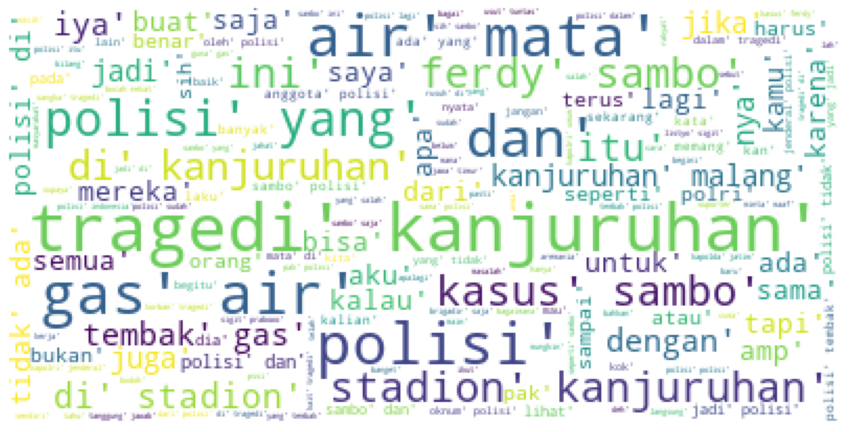

In [56]:
stopwords_indo = stopwords.words('indonesian')
stopwords_indo.extend(stopword_list)

OAGTokensWOStop = []
for item in data_twitt['tweet_tokens_stemmed']:
    temp = []
    for tweet in item:
        if tweet not in stopwords_indo:
            temp.append(tweet)
    OAGTokensWOStop.append(temp)

In [61]:
#convert it to dictionary with values and its occurences
from collections import Counter
from wordcloud import WordCloud
import itertools
import matplotlib.pyplot as plt


combined_text = " ".join(OAGTokensWOStop)

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=stopword_list,
        ).generate(OAGTokensWOStop)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('file.png', bbox_inches='tight')
plt.close()

TypeError: sequence item 0: expected str instance, list found

In [34]:
data_twitt['tweet_tokens_stemmed']

0        ['sama', 'mas', 'saya', 'pikir', 'fokus', 'sam...
1        ['aduh', 'polisi', 'lagi', 'yang', 'tonjol', '...
2        ['buat', 'konsorsium', 'judi', 'jadi', 'sindik...
3        ['yang', 'tidak', 'punya', 'wibawa', 'iya', 'j...
4        ['tambah', 'lagi', 'dengan', 'tembak', 'gas', ...
                               ...                        
19997    ['ini', 'baru', 'benar', 'polisipengayomrakyat...
19998    ['polisi', 'sambo', 'budaya', 'keras', 'om', '...
19999    ['kuak', 'kenapa', 'densi', 'kebal', 'hukum', ...
20000    ['kata', 'bapak', 'aku', 'polisi', 'sewa', 'uy...
20001    ['apresiasi', 'cepat', 'polisi', 'dalam', 'usu...
Name: tweet_tokens_stemmed, Length: 20002, dtype: object